# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

# reading in the movies dataset
movies_df = pd.read_csv("../data/output_data/combined_movies.csv")

In [2]:
# removing the first row
movies_df = movies_df.iloc[1:]

In [3]:
# dropping unnecessary columns: Poster URL and Overview
movies_df = movies_df.drop(columns=["Poster URL", "Overview"])

In [4]:
# dropping missing values
movies_df = movies_df.dropna()

# dropping zeros (budget and revenue)
movies_df = movies_df[(movies_df["Budget"] != 0) & (movies_df["Revenue"] != 0)]

In [5]:
# converting runtime to numeric
movies_df["Runtime"] = movies_df["Runtime"].str.replace(" min", "").astype(int)

In [6]:
# splitting the released date into year, month, and day
movies_df["Released"] = pd.to_datetime(movies_df["Released"], errors='coerce')
movies_df["Year"] = movies_df["Released"].dt.year
movies_df["Month"] = movies_df["Released"].dt.month
movies_df["Day"] = movies_df["Released"].dt.day

# dropping the original Released column
movies_df = movies_df.drop(columns=["Released"])

In [7]:
# making the genre column one-hot encoded
genre_dummies = movies_df["Genre"].str.get_dummies(sep=', ')
movies_df = pd.concat([movies_df, genre_dummies], axis=1)

# dropping the original genre column
movies_df = movies_df.drop(columns=["Genre"])

In [8]:
# making the MPAA rating one-hot encoded
mpaa_dummies = movies_df["Rated"].str.get_dummies(sep=', ')
movies_df = pd.concat([movies_df, mpaa_dummies], axis=1)

# dropping the original MPAA rating column
movies_df = movies_df.drop(columns=["Rated"])

In [9]:
# creating variable that indicates the movie was made by a big production company
companies = ["Universal Pictures", "Paramount Pictures", "Warner Bros. Pictures", "Walt Disney Pictures", "Walt Disney Feature Animation", "Sony Pictures", "Universal Pictures", "20th Century Fox", "Columbia Pictures", "Lionsgate", "Metro-Goldwyn-Mayer", "Marvel Studios", "Pixar Animation Studios", "DreamWorks Animation", "DreamWorks Pictures", "New Line Cinema", "Focus Features", "Orion Pictures", "United Artists", "A24", "Searchlight Pictures"]
movies_df["Top_Production_Company"] = movies_df["Production Companies"].apply(lambda x: int(any(company in x for company in companies)))

# dropping the original Production Companies column
movies_df = movies_df.drop(columns=["Production Companies"])

In [10]:
# creaing variable that indicates the movie was directed by top 25 director
top_directors = ["Steven Spielberg", "James Cameron", "Russo brohters", "Peter Jackson", "Michael Bay", "David Yates", "Christopher Nolan", "Ridley Scott", "Tim Burton", "J.J. Abrams", "Ron Howard", "Robert Zemeckis", "Jon Favreau", "Sam Raimi", "James Wan", "Chris Columbus", "Roland Emmerich", "Jon Watts", "Gore Verbinski", "Bryan Singer", "Pierre Coffin", "Francis Lawrence", "Clint Eastwood", "George Lucas", "Brad Bird", "M. Night Shyamalan", "Todd Phillips", "Chris Renaud", "Zack Snyder", "Kyle Balda"]
movies_df["Top_Director"] = movies_df["Director"].apply(lambda x: int(any(director in x for director in top_directors)))

# dropping the original Director column
movies_df = movies_df.drop(columns=["Director"])

In [11]:
# creaing variable that indicates the movie was written by top 20 writer

# splitting the column and keeping only the first writer
movies_df["Writer"] = movies_df["Writer"].str.split(',').str[0]


top_writers =  ["Aaron Sorkin", "Quentin Tarantino", "Woody Allen", "Billy Wilder", "Joel Coen", "Ethan Coen", "Oliver Stone", "William Goldman", "Steven Zaillian", "James Cameron", "Mel Brooks", "Paul Schrader", "Ingmar Bergman", "Lawrence Kasdan", "Eric Roth", "Alan Ball", "Paul Thomas Anderson", "Walter Hill", "John Hughes", "David Lynch"]
movies_df["Top_Writer"] = movies_df["Writer"].apply(lambda x: int(any(writer in x for writer in top_writers)))

# dropping the original Director column
movies_df = movies_df.drop(columns=["Writer"])

In [12]:
# converting text variables to strings

movies_df["Title"] = movies_df["Title"].astype("string")
movies_df["Actors"] = movies_df["Actors"].astype("string")
movies_df["Description"] = movies_df["Description"].astype("string")
movies_df["Tagline"] = movies_df["Tagline"].astype("string")

In [13]:
# convering IMDB votes to numeric
movies_df["IMDB Votes"] = movies_df["IMDB Votes"].str.replace(",", "").astype(int)

In [14]:
# converting box office to numeric
movies_df["Box Office"] = movies_df["Box Office"].str.replace("$", "").str.replace(",", "").astype(float)

In [15]:
# splitting the column and keeping only the first language
movies_df["Country"] = movies_df["Country"].str.split(',').str[0]

# creating variable that indicates the movie was made in English
movies_df["Domestic"] = movies_df["Country"].apply(lambda x: int(x == "United States"))
# variable that indicates the movie was made in other language
movies_df["International"] = movies_df["Country"].apply(lambda x: int(x != "United States"))

# dropping the original country column
movies_df = movies_df.drop(columns=["Country"])

In [16]:
# splitting the column and keeping only the first language
movies_df["Language"] = movies_df["Language"].str.split(',').str[0]

# creating variable that indicates the movie was made in English
movies_df["English_Language"] = movies_df["Language"].apply(lambda x: int(x == "English"))
# variable that indicates the movie was made in other language
movies_df["Other_Language"] = movies_df["Language"].apply(lambda x: int(x != "English"))

# dropping the original country column
movies_df = movies_df.drop(columns=["Language"])

In [17]:
import re

# converting the awards column to numeric
movies_df["Oscars_Won"] = 0
movies_df["Oscars_Nominated"] = 0
movies_df["Wins"] = 0
movies_df["Nominations"] = 0

# extracting the wins/nominations
for i, row in movies_df.iterrows():
    text = row["Awards"]

    # oscars
    won_oscar = re.search(r"Won (\d+) Oscar", text)
    nom_oscar = re.search(r"Nominated for (\d+) Oscar", text)
    if won_oscar:
        movies_df.at[i, "Oscars_Won"] = int(won_oscar.group(1))
    if nom_oscar:
        movies_df.at[i, "Oscars_Nominated"] = int(nom_oscar.group(1))

    # wins
    wins = re.search(r"(\d+) wins?", text)
    if wins:
        movies_df.at[i, "Wins"] = int(wins.group(1))

    # nominations
    noms = re.search(r"(\d+) nominations?", text)
    if noms:
        movies_df.at[i, "Nominations"] = int(noms.group(1))

# dropping the original Awards column
movies_df = movies_df.drop(columns=["Awards"])

In [18]:
# check data types
print(movies_df.dtypes[:10])
print(movies_df.dtypes[10:20])
print(movies_df.dtypes[20:24])

Title          string[python]
Year                    int32
Runtime                 int64
Actors         string[python]
IMDB Rating           float64
Metascore             float64
IMDB Votes              int64
Box Office            float64
Description    string[python]
Tagline        string[python]
dtype: object
Budget           int64
Revenue          int64
TMDB Rating    float64
Vote Count       int64
Month            int32
Day              int32
Action           int64
Adventure        int64
Animation        int64
Biography        int64
dtype: object
Comedy         int64
Crime          int64
Documentary    int64
Drama          int64
dtype: object


In [19]:
movies = len(movies_df)
print("Number of movies:", movies)

Number of movies: 2816


In [20]:
# check number of columns
columns = len(movies_df.columns)
print("Number of columns:", columns)

Number of columns: 61


In [21]:
movies_df.to_csv("../data/output_data/clean_movies.csv", index=False)

### EDA

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# reading in the cleaned movies dataset
movies_df = pd.read_csv("../data/output_data/clean_movies.csv")

Bad value in file PosixPath('/Users/lizziehealy/.matplotlib/stylelib/liz_style.mplstyle'), line 1 ('figure.facecolor : #D3D3D3'): Key figure.facecolor: '' does not look like a color arg
Bad value in file PosixPath('/Users/lizziehealy/.matplotlib/stylelib/liz_style.mplstyle'), line 19 ('axes.facecolor : #FFFFFF'): Key axes.facecolor: '' does not look like a color arg


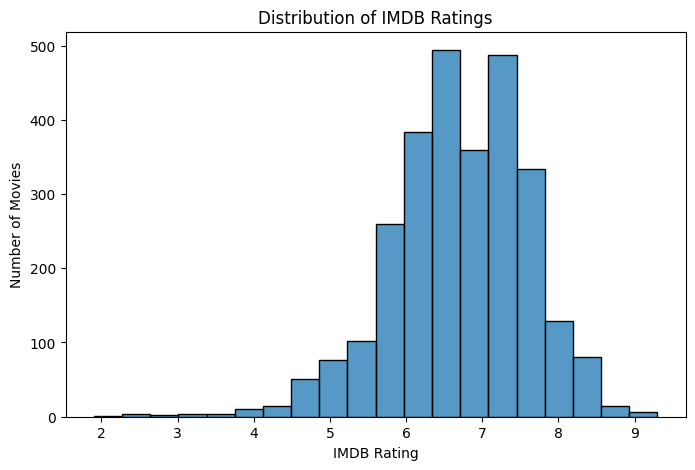

In [23]:
# histogram of IMDb ratings
imdb = movies_df['IMDB Rating']

plt.figure(figsize=(8, 5))
sns.histplot(imdb, bins=20, edgecolor='black')
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of IMDB Ratings')
plt.savefig('./notebook_output/imdb_rating.png')
plt.show()

In [24]:
# summary statistics for numerical variables
# getting the min, mean, max, and std dev
print("Box Office Statistics:")
print("Min:", movies_df["Box Office"].min())
print("Mean:", movies_df["Box Office"].mean())
print("Max:", movies_df["Box Office"].max())
print("Std Dev:", movies_df["Box Office"].std())

print("\nBudget Statistics:")
print("Min:", movies_df["Budget"].min())
print("Mean:", movies_df["Budget"].mean())
print("Max:", movies_df["Budget"].max())
print("Std Dev:", movies_df["Budget"].std())

print("\nIMDB Rating Statistics:")
print("Min:", movies_df["IMDB Rating"].min())
print("Mean:", movies_df["IMDB Rating"].mean())
print("Max:", movies_df["IMDB Rating"].max())
print("Std Dev:", movies_df["IMDB Rating"].std())

print("\nIMDB Votes Statistics:")
print("Min:", movies_df["IMDB Votes"].min())
print("Mean:", movies_df["IMDB Votes"].mean())
print("Max:", movies_df["IMDB Votes"].max())
print("Std Dev:", movies_df["IMDB Votes"].std())

print("\nRuntime Statistics:")
print("Min:", movies_df["Runtime"].min())
print("Mean:", movies_df["Runtime"].mean())
print("Max:", movies_df["Runtime"].max())
print("Std Dev:", movies_df["Runtime"].std())

Box Office Statistics:
Min: 3622.0
Mean: 73753531.26740056
Max: 858373000.0
Std Dev: 88133798.11221693

Budget Statistics:
Min: 7000
Mean: 49601710.70170455
Max: 460000000
Std Dev: 54138962.49989549

IMDB Rating Statistics:
Min: 1.9
Mean: 6.6998224431818185
Max: 9.3
Std Dev: 0.9045356229312045

IMDB Votes Statistics:
Min: 1672
Mean: 222006.69282670456
Max: 3059994
Std Dev: 284492.17231449694

Runtime Statistics:
Min: 63
Mean: 113.29225852272727
Max: 238
Std Dev: 20.602561285492758


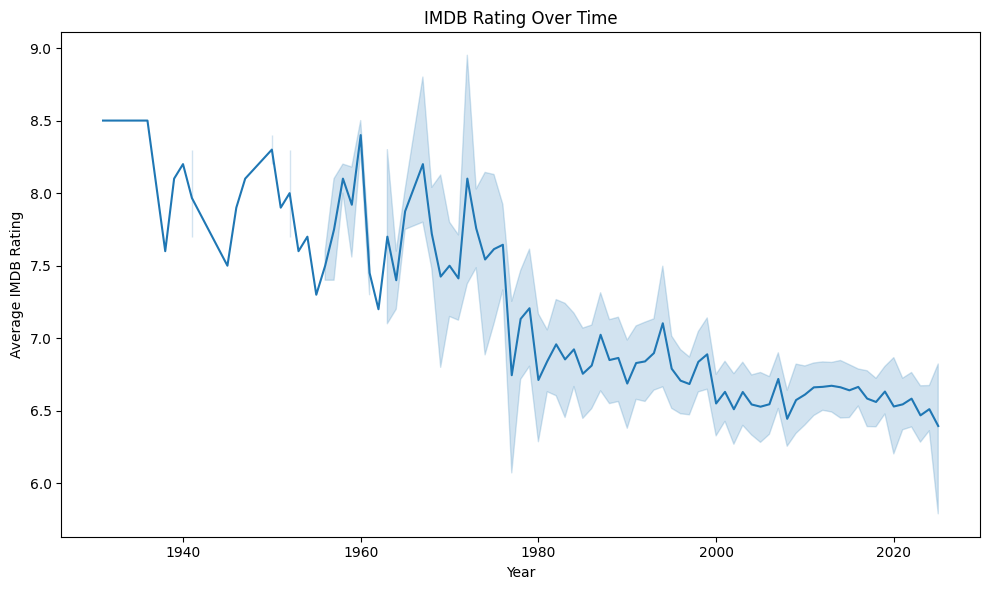

In [25]:
# time series plot of IMDb ratings
plt.figure(figsize=(10, 6))
sns.lineplot(x=movies_df['Year'], y=movies_df['IMDB Rating'])
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.title('IMDB Rating Over Time')
plt.tight_layout()
plt.savefig('./notebook_output/imdb_overtime.png')
plt.show()

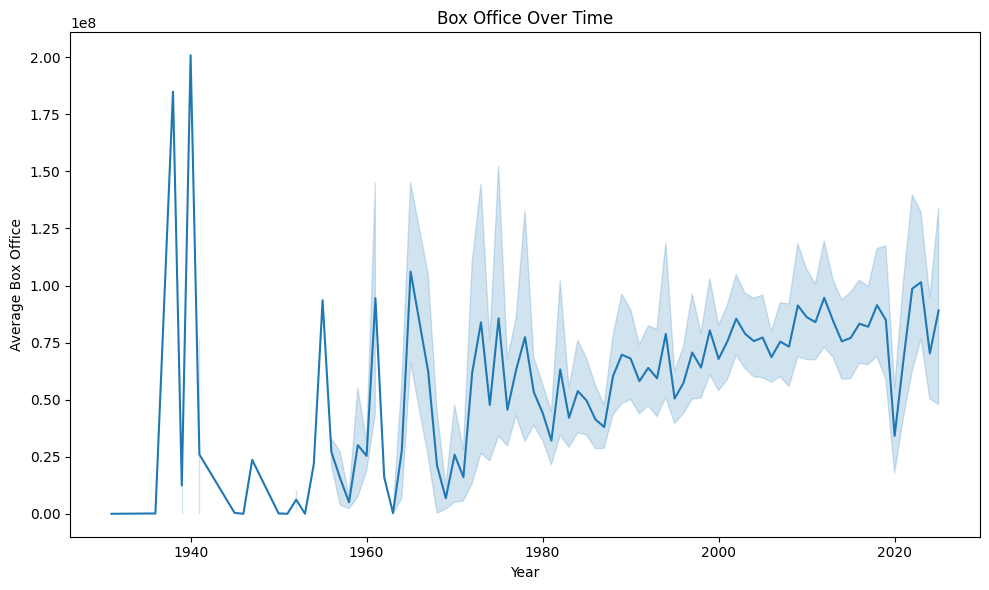

In [26]:
# time series plot of box office
plt.figure(figsize=(10, 6))
sns.lineplot(x=movies_df['Year'], y=movies_df['Box Office'])
plt.xlabel('Year')
plt.ylabel('Average Box Office')
plt.title('Box Office Over Time')
plt.tight_layout()
plt.savefig('./notebook_output/boxoffice_overtime.png')
plt.show()

/var/folders/f7/px3ynpyn7l3g5j59yyvbggrw0000gn/T/ipykernel_90245/3245275530.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


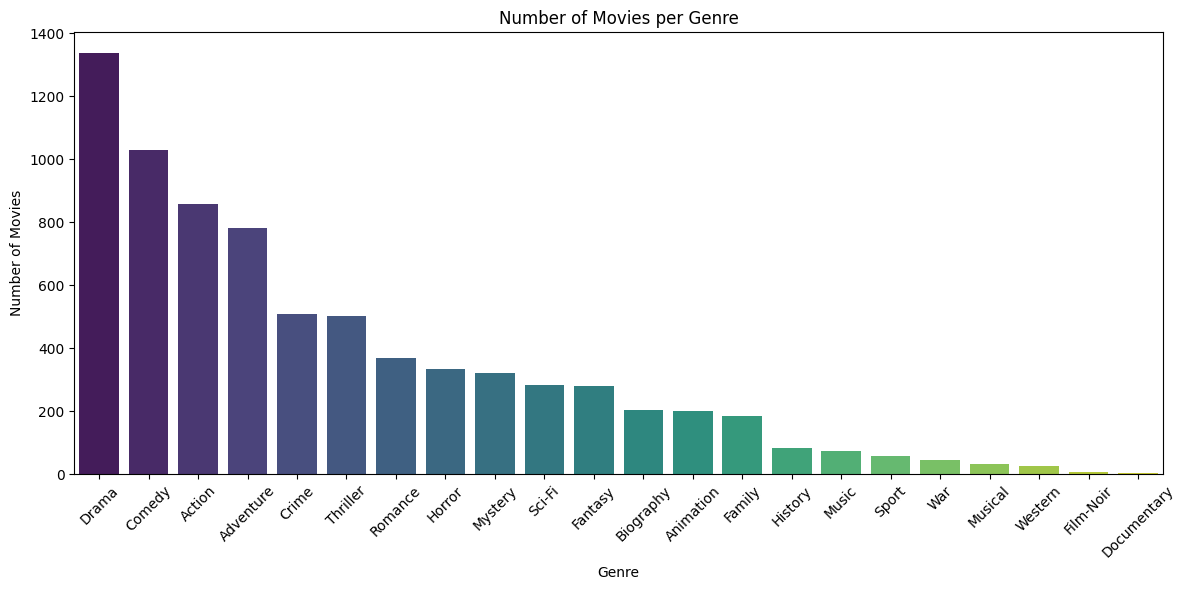

In [27]:
# getting the count of movies per genre
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
    'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'
]
genre_counts = movies_df[genre_columns].sum().sort_values(ascending=False)

# bar plot of number of movies per genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.tight_layout()
plt.savefig('./notebook_output/genre_counts.png')
plt.show()

/var/folders/f7/px3ynpyn7l3g5j59yyvbggrw0000gn/T/ipykernel_90245/3964716411.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rated_counts.index, y=rated_counts.values, palette='mako')


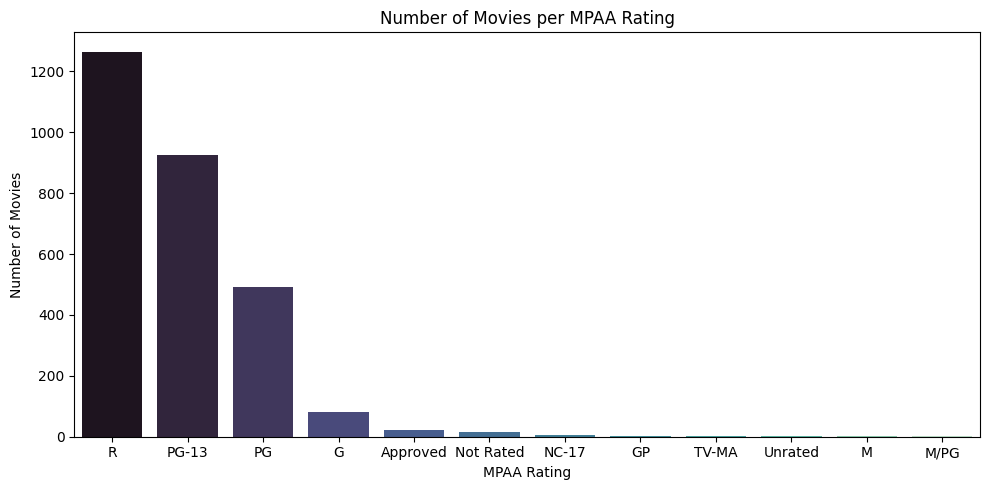

In [28]:
# list of MPAA rating columns
rated_columns = [
    'Approved', 'G', 'GP', 'M', 'M/PG', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-MA', 'Unrated'
]
rated_counts = movies_df[rated_columns].sum().sort_values(ascending=False)

# bar plot of number of movies per MPAA rating
plt.figure(figsize=(10, 5))
sns.barplot(x=rated_counts.index, y=rated_counts.values, palette='mako')
plt.xlabel('MPAA Rating')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per MPAA Rating')
plt.tight_layout()
plt.savefig('./notebook_output/rated_counts.png')
plt.show()


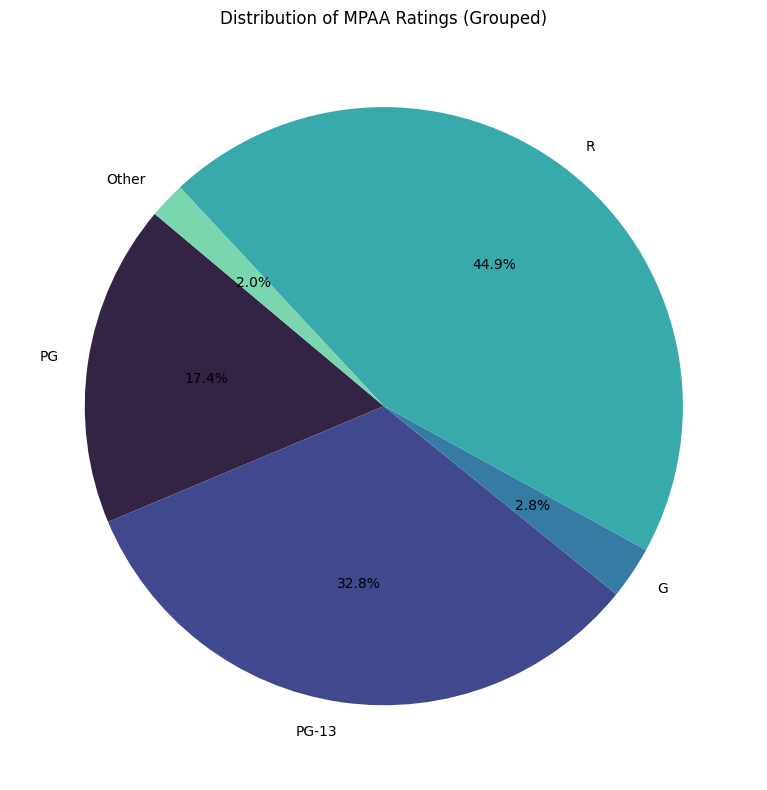

In [29]:
# pie chart of number of movies per MPAA rating
main_ratings = ['PG', 'PG-13', 'G', 'R']
grouped_counts = rated_counts.copy()

# summing all "other" ratings
other_count = grouped_counts[~grouped_counts.index.isin(main_ratings)].sum()

# keeping only main ratings and add "Other"
grouped_counts = grouped_counts[main_ratings]
grouped_counts['Other'] = other_count

plt.figure(figsize=(8, 8))
plt.pie(grouped_counts, labels=grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('mako', len(grouped_counts)))
plt.title('Distribution of MPAA Ratings (Grouped)')
plt.tight_layout()
plt.savefig('./notebook_output/mpaa_pie.png')
plt.show()